## Fractal
---

In [2]:
:dep image
:dep num-complex
:dep evcxr_image

In [3]:
use image::{ImageBuffer, Rgb};
use num_complex::Complex;
use evcxr_image::ImageDisplay;

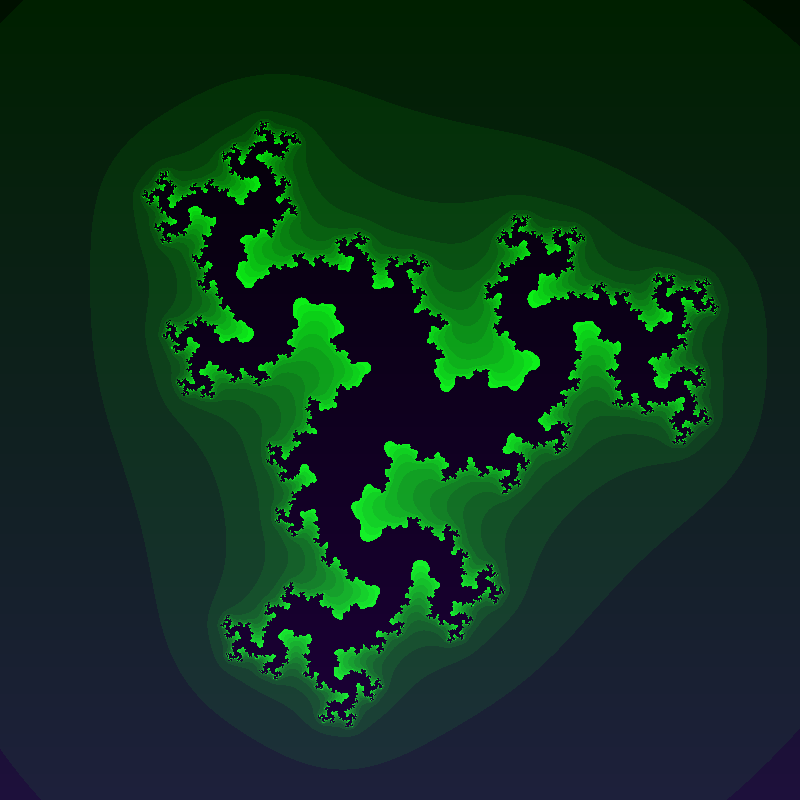

In [4]:
fn fractal() -> ImageBuffer<Rgb<u8>, Vec<u8>> {
    let imgx = 800;
    let imgy = 800;
    let scalex = 3.0 / imgx as f32;
    let scaley = 3.0 / imgy as f32;
    let mut img = ImageBuffer::new(imgx, imgy);
    for (x, y, pixel) in img.enumerate_pixels_mut() {
        let g = (0.3 * x as f32) as u8;
        let b = (0.3 * y as f32) as u8;
        *pixel = image::Rgb([b/8, g, b/4]);
    }
    for x in 0..imgx {
        for y in 0..imgy {
            let cx = y as f32 * scalex - 1.5;
            let cy = x as f32 * scaley - 1.5;
            let c = Complex::new(-0.49, 0.61);
            let mut z = Complex::new(cx, cy);
            let mut i = 0;
            while i < 255 && z.norm() <= 8.0 {
                z = z*z*z + c;
                i += 16;
            }
            let pixel = img.get_pixel_mut(x, y);
            let image::Rgb(data) = *pixel;
            *pixel = image::Rgb([data[0], i as u8, data[2]]);
        }
    }
    img
}
fractal()